In [1]:
import sys
sys.path.append("../../utilities/")
sys.path.append("../../src")
from dataset_class import dataset
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
GM12878_signals_names = ['DNase', 'H3K4me2', 'H3K27ac', 'H2A.Z', 'H3K9me3', 'H3K4me1', 'H3K27me3', 'H3K9ac', 'H3K4me3', 'H3K36me3', 'H3K79me2', 'H4K20me1']
datasets = {}
for res in [10000, 25000, 100000]:
    
    datasets[res] = dataset('GM12878', 'hg19', res, '../../data/GM12878/hg19/Hi-C/GSE63525_GM12878_insitu_primary_30.hic',
                     '../../utilities/juicer_tools_1.22.01.jar', '../../data/GM12878/hg19/Hi-C/res{}'.format(res),
                     GM12878_signals_names, '../../data/GM12878/hg19/genomic-assays/bin_{}/'.format(res), 
                      '../../data/GM12878/hg19/res{}_datasets/'.format(res),
                      '../../data/', '../../utilities/config.json')
    datasets[res].load_pos2ind_and_ind2pos_maps('../../data/valid_bins/hg19/GM12878_{}_bins.txt'.format(res))

In [12]:
start_ind = np.sum(datasets[10000].get_chunks_lengths()[:17])
last_ind = np.sum(datasets[10000].get_chunks_lengths()[:18])

In [62]:
# Chr1 (40-50 Mbp)
signals = {}
autocorrelations = {}

In [63]:
# resolution 10000
start_ind = int(datasets[10000].pos2ind_dict['chr1'][4000])
last_ind = int(datasets[10000].pos2ind_dict['chr1'][5000])
signals[10000] = datasets[10000].get_chrom_signals(1).iloc[start_ind:last_ind,:]

# resolution 25000
start_ind = int(datasets[25000].pos2ind_dict['chr1'][1600])
last_ind = int(datasets[25000].pos2ind_dict['chr1'][2000])
signals[25000] = datasets[25000].get_chrom_signals(1).iloc[start_ind:last_ind,:]

# resolution 100000
start_ind = int(datasets[100000].pos2ind_dict['chr1'][400])
last_ind = int(datasets[100000].pos2ind_dict['chr1'][500])
signals[100000] = datasets[100000].get_chrom_signals(1).iloc[start_ind:last_ind,:]

In [113]:
autocorrelations[10000] = {}
for s_num in range(len(GM12878_signals_names)):
    autocorrelations[10000][GM12878_signals_names[s_num]] = []
    s = signals[10000].iloc[:,s_num].values
    for r in np.arange(1,s.shape[0]):
        autocorrelations[10000][GM12878_signals_names[s_num]].append(np.corrcoef(s[:-r],s[r:])[0,1])

In [112]:
autocorrelations[25000] = {}
for s_num in range(len(GM12878_signals_names)):
    autocorrelations[25000][GM12878_signals_names[s_num]] = []
    s = signals[25000].iloc[:,s_num].values
    for r in np.arange(1,s.shape[0]):
        autocorrelations[25000][GM12878_signals_names[s_num]].append(np.corrcoef(s[:-r],s[r:])[0,1])

In [111]:
autocorrelations[100000] = {}
for s_num in range(len(GM12878_signals_names)):
    autocorrelations[100000][GM12878_signals_names[s_num]] = []
    s = signals[100000].iloc[:,s_num].values
    for r in np.arange(1,s.shape[0]):
        autocorrelations[100000][GM12878_signals_names[s_num]].append(np.corrcoef(s[:-r],s[r:])[0,1])

/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


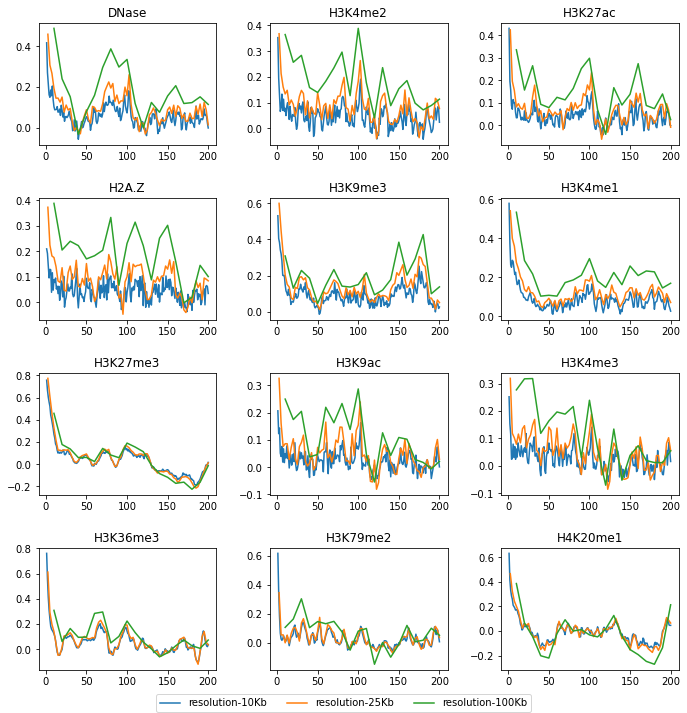

In [133]:
fig, axs = plt.subplots(4,3, figsize = (10,10))
for s, signal_name in enumerate(GM12878_signals_names):
    row_ind = int(s/3)
    col_ind = s%3
    sns.lineplot(x=np.arange(1,201), y=autocorrelations[10000][signal_name][0:200],
                 ax = axs[row_ind,col_ind], label = 'resolution-10Kb')
    sns.lineplot(x=np.arange(2.5,201,2.5), y=autocorrelations[25000][signal_name][0:80], 
                 ax = axs[row_ind,col_ind], label = 'resolution-25Kb')
    sns.lineplot(x=np.arange(10,201,10), y=autocorrelations[100000][signal_name][0:20], 
                 ax = axs[row_ind,col_ind], label = 'resolution-100Kb')
    axs[row_ind,col_ind].set_title(signal_name, fontsize = 12)
    axs[row_ind,col_ind].get_legend().remove()
handles, labels = axs[0,0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='right', prop={'size': 30})
fig.legend(handles, labels, loc="lower center", ncol=3, borderaxespad=0.1)
fig.tight_layout(pad=2.0)
fig.savefig('results/resolutions_autocorrs.png', dpi = 300,
            bbox_inches='tight',facecolor='white', transparent=False)